In [1]:
# import requests
from __future__ import print_function    # (at top of module)
import time
import sys
import os
import pandas as pd
import numpy as np

PROJ_ROOT = os.path.join(os.getcwd(), os.pardir)

%load_ext watermark
%watermark -a "Thomas Turner" -d -t -v -p numpy,pandas -g

Thomas Turner 07/26/2016 15:42:36 

CPython 3.5.2
IPython 5.0.0

numpy 1.11.1
pandas 0.18.1
Git hash: 7c9ac61bbbc69a4f5fbfb63e2c5bef57fb462f16


In [2]:
# load environment variables from .env file using dotenv.
from dotenv import load_dotenv
dotenv_path = os.path.join(PROJ_ROOT, '.env')
load_dotenv(dotenv_path)

# Load the "autoreload" extension
%load_ext autoreload

# always reload modules marked with "%aimport"
%autoreload 1

# add the 'src' directory as one where we can import modules
src_dir = os.path.join(PROJ_ROOT, 'src')
sys.path.append(src_dir)

# import my method from the source code
%aimport data.spotipy_functions
from data.spotipy_functions import get_tracks_from_playlist
from data.spotipy_functions import features_list

In [3]:
# This line tells the notebook to show plots inside of the notebook
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sb

In [4]:
playlists = pd.read_csv(os.path.join(PROJ_ROOT,'data','raw','spotify_playlists.csv'))

In [5]:
playlists

,playlist_id,playlist_name,user_id
0,2Ejbdf2DC9JGr5qdT0Z852,Old School Hip Hop House Party,spotify_uk_
1,7wUUwoxU2S6BRKA2bDPYKD,Massive dance hits,spotify_uk_
2,2aUKPl1SatBDloOMrR1hAp,Indie Roadtrip,spotify_uk_
3,5O2ERf8kAYARVVdfCKZ9G7,Coffee Table Jazz,spotify
4,6CRNGyV2hoQDyYpUPjHrkz,Top Classical,spotify
5,4EMB7RVcDBWTJDzsr1jXMe,Spin Deep House 40,goldjr


In [6]:
data_array = []
for i in range(6):
    print(i)
    table = features_list(get_tracks_from_playlist(playlists.ix[i,2],playlists.ix[i,0]))
    table['playlist_id'] = playlists.ix[i,0]
    table['playlist_name'] = playlists.ix[i,1]
    table['data_set'] = i
    data_array.append(table)
master_dataset = pd.concat(data_array)



0
1
2
3
4
5


In [27]:
master_dataset.shape

(350, 21)

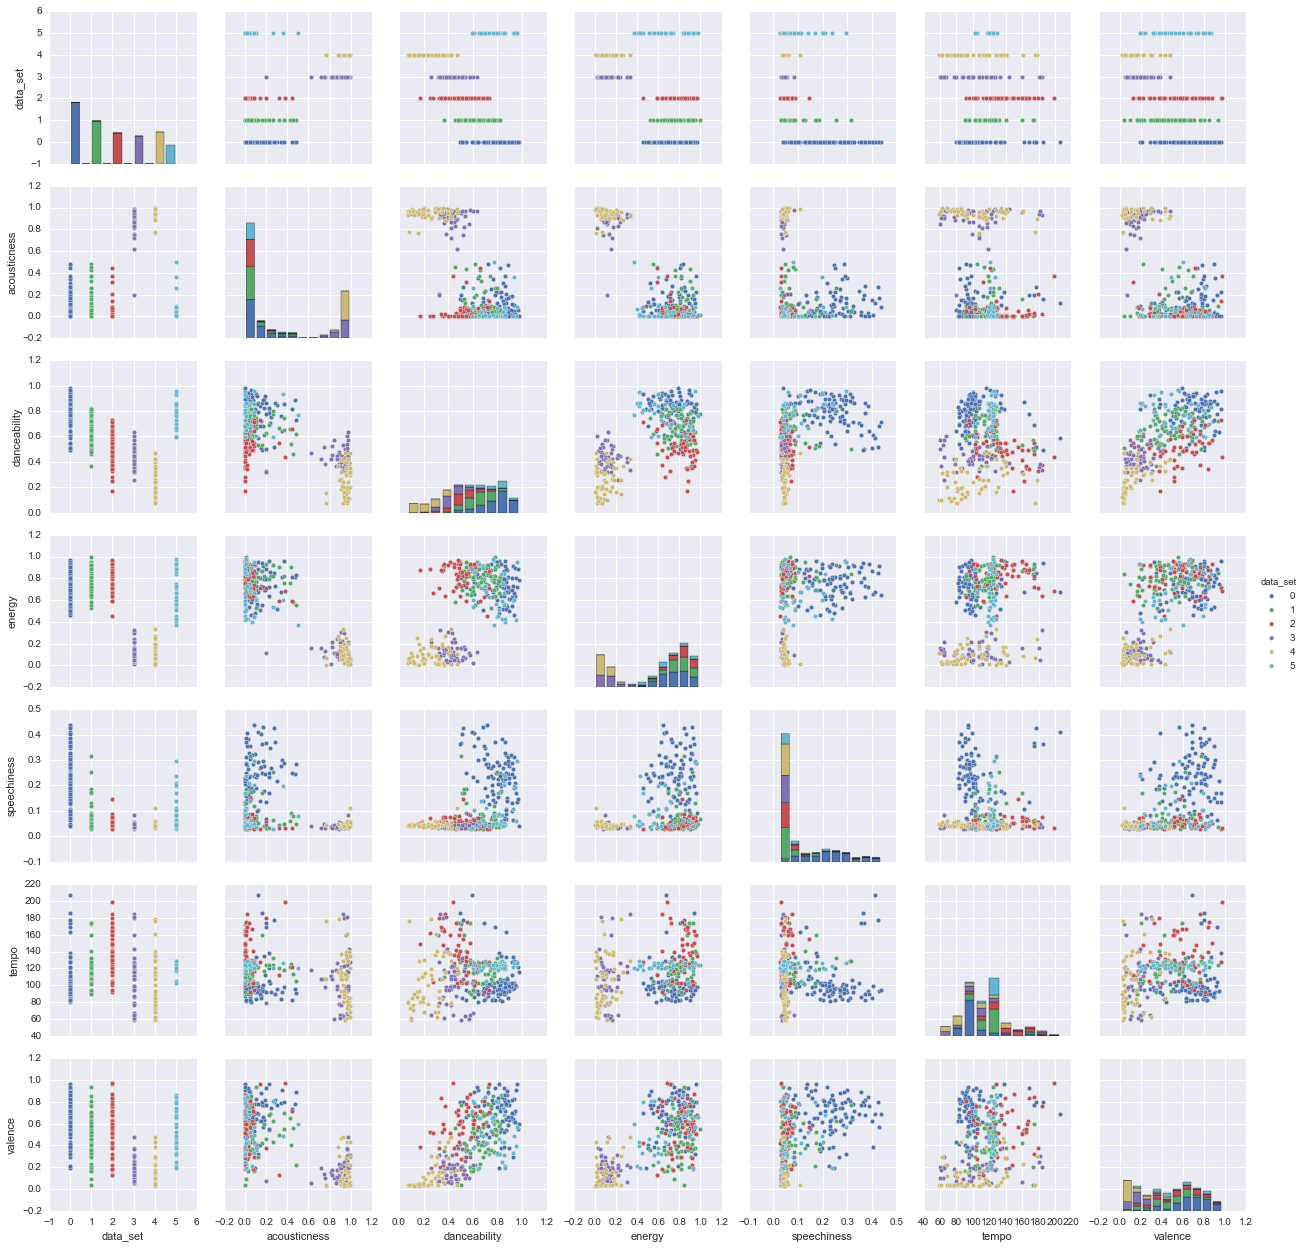

In [15]:
feature_subset = master_dataset[['playlist_name','data_set','acousticness','danceability','energy','speechiness','tempo','valence']]
sb.pairplot(feature_subset.dropna(), hue='data_set')

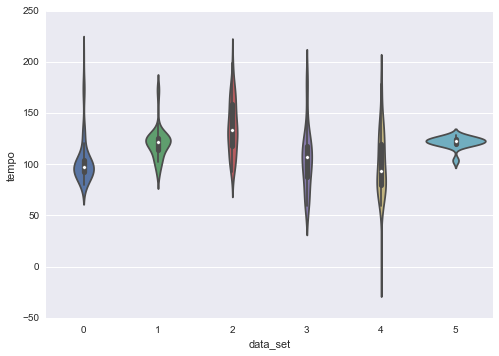

In [16]:
sb.violinplot(x='data_set', y='tempo', data=feature_subset)

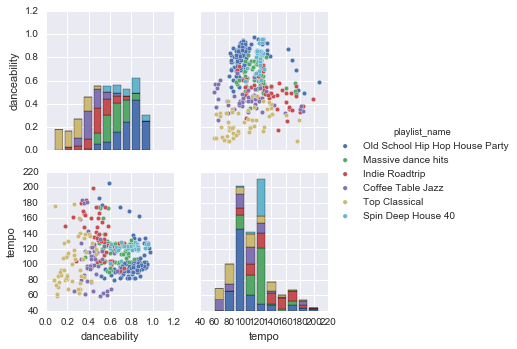

In [18]:
tempo_vs_danceable = master_dataset[['playlist_name','danceability','tempo',]]
sb.pairplot(tempo_vs_danceable.dropna(), hue='playlist_name')

In [94]:
sb.violinplot?